<a href="https://colab.research.google.com/github/lucaskydelima/Cluster-Analysis-in-Python/blob/main/K_means_clustering_exercise_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# Generate X (N X D)
# Initialize cluster centers by randomly choosing K points from X
# Loop:
    # 2 steps discussed previously
    # Exit loop if converged
# Scatterplot of data colored by cluster identity, showing cluster centers

In [174]:
import numpy as np
import matplotlib.pyplot as plt

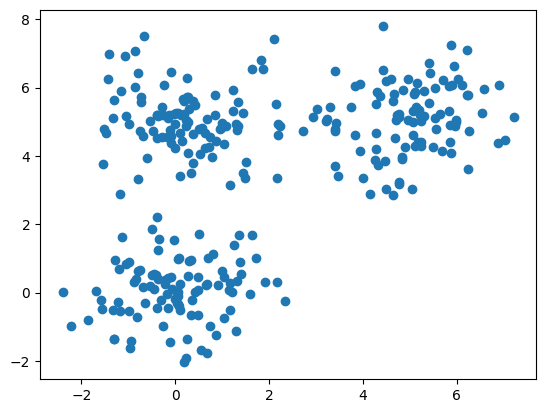

In [175]:
K = 3
D = 2
N = 300

mu = np.array([
    [0,0],
    [0,5],
    [5,5]
])

# Generate X (N X D)
X = np.zeros((N,D))

X[:100,] = np.random.randn(100,D) + mu[0]
X[100:200,] = np.random.randn(100, D) + mu[1]
X[200:300,] = np.random.randn(100, D) + mu[2]

plt.scatter(x=X[:,0], y=X[:,1])

In [176]:
# Initialize cluster centers by randomly choosing K points from X
rng = np.random.default_rng()
cluster_centers = rng.choice(X, 3)
cluster_centers

array([[-0.36230858,  0.38374319],
       [ 1.25814397,  1.39510767],
       [ 0.96511997,  4.82005445]])

In [177]:
# Loop:
    # 2 steps discussed previously
    # Exit loop if converged

cluster_identities = np.zeros(N)
saved_cluster_identities = []
costs = []
max_iters = 20

for i in range(max_iters):

  old_cluster_identities = np.copy(cluster_identities)
  saved_cluster_identities.append(old_cluster_identities)
  min_dist = 0

  for index, value in enumerate(X):
    distances = np.empty((0))
    for center in cluster_centers:
      d = np.linalg.norm(value - center)
      distances = np.append(distances, d)
    cluster_identities[index] = np.argmin(distances)
    min_dist += np.amin(distances)

  costs.append(min_dist)

  print(f"Cost function on step {i} = {costs[i]}")

  if(np.array_equal(cluster_identities, old_cluster_identities)):
    print(f"Converged on step {i}")
    break
 
  for k in range(K):
    cluster_centers[k,:] = X[cluster_identities==k].mean(axis=0)


Cost function on step 0 = 648.3014523090161
Cost function on step 1 = 619.1009765807487
Cost function on step 2 = 612.0397734241527
Cost function on step 3 = 608.4278711944502
Cost function on step 4 = 606.4871248289211
Cost function on step 5 = 604.5176107135286
Cost function on step 6 = 568.7554869539456
Cost function on step 7 = 414.78236627518015
Cost function on step 8 = 358.76379398003394
Cost function on step 9 = 355.5388429331809
Converged on step 9


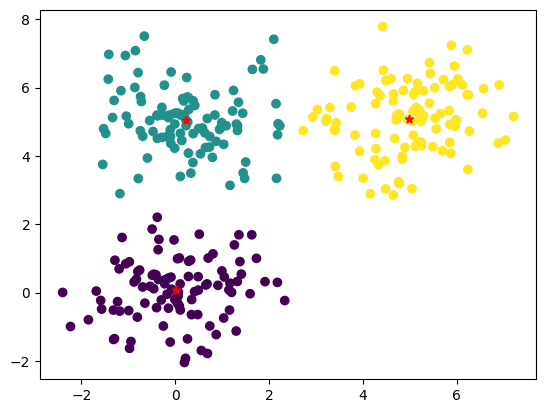

In [178]:
# Scatterplot of data colored by cluster identity, showing cluster centers
plt.scatter(x=X[:,0], y=X[:,1], c=cluster_identities)
plt.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], c="red", marker="*")

<ipython-input-179-17112db9dc79>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(M, 1, i + 1)


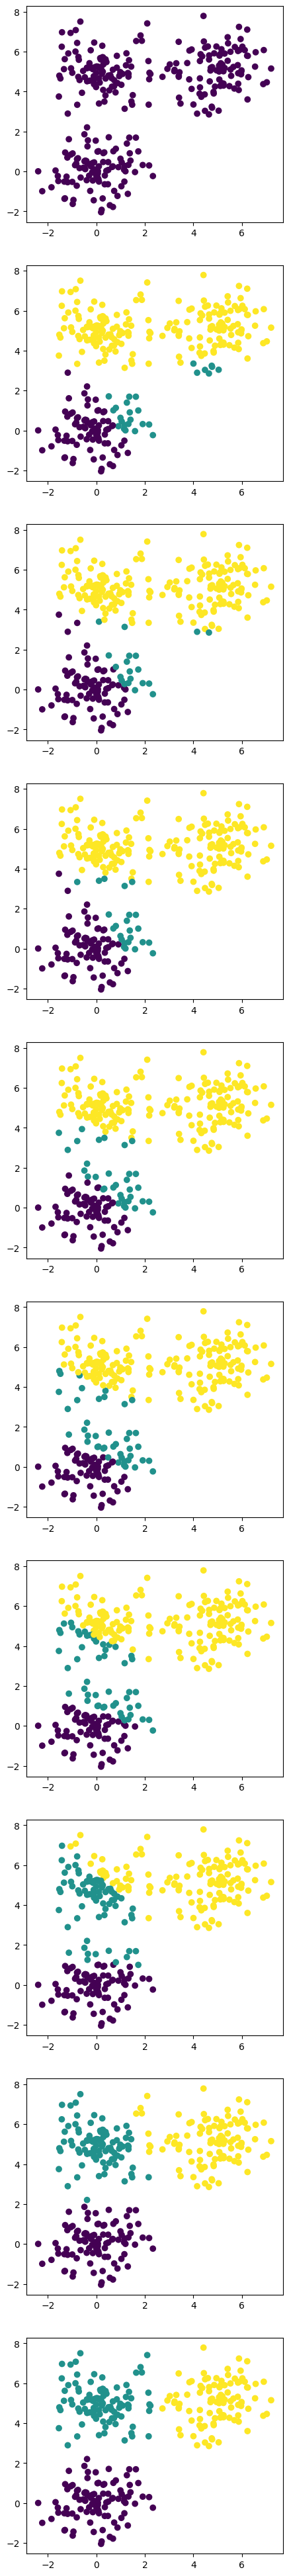

In [179]:
# Showing training progress 
M = len(saved_cluster_identities)

# Set one size for all subplots
fig, ax = plt.subplots(figsize=(5, 5 * M))

for i in range(M):
  plt.subplot(M, 1, i + 1)
  Y = saved_cluster_identities[i]
  plt.scatter(x=X[:,0], y=X[:,1], c=Y)

Text(0, 0.5, 'Loss')

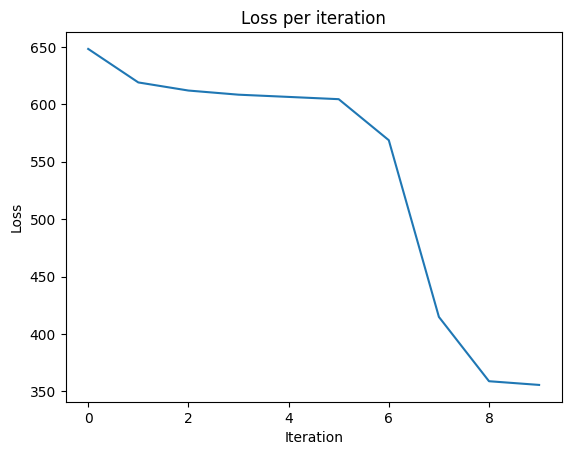

In [180]:
plt.plot(costs)
plt.title("Loss per iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")